*Supporting textbook chapters for week 2: 4.3, 5.1-5.3.*

This week's topics:
* Numerical errors,
* How to compute integrals (basic methods).

# Numerical errors

Aside from errors in programming or discretizing the physical model, there are 2 types of errors in computations:
1. Rounding errors: errors in how the computer stores or manipulates numbers.
2. Approximation errors (sometimes called truncation errors): errors in approximations to various functions or methods.

Reason: computers are machines, with inherent limitations.

## Two examples

### Machine error: round-off error.

Under what circumstances is the following possible?
$$(x+y)+z \neq x + (y + z)$$

Let's try it in Python:

In [3]:
x=1e20
y=-1e20
z=1

(x+y)+z
x+(y+z)

0.0

What happened? 

Round-off error!

### Algorithmic error: instability

Consider this system representing phasor rotation in the complex plane:
$$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
Solution is
$Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically?

Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$

Suggests algorithm: 
* Start with $Z(t=0)=Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat.

**Let's code it up and see**

In [7]:
# Unstable solution to dZ/dt
from numpy import pi

# initialize Z0, omega and dt below;
Z = complex(1., 0.)
omega = 1.
dt = 2*pi/(200*omega)

# print for piece of mind
print('t = {0}, Z = {1}, |Z| = {2}'.format(0., Z, abs(Z)))

t = 0.0, Z = (1+0j), |Z| = 1.0


In [10]:
for k in range(201):
    Z *= complex(1, dt)

print('t = {0}, Z = {1}, |Z| = {2}'.format(k*dt, Z, abs(Z)))

t = 6.283185307179587, Z = (1.2172066320400114+0.07150713273352693j), |Z| = 1.2193052345963082


What happened? What is the problem? Why did it happen?

## Integers and floats

This begs the question: how does a computer represent a number?

* Variables `a`, `b` and `c` below are all equal to 1000.
* Yet, `a` is treated very differently by da Python than `b` and `c`:

In [11]:
a = 1000
b = 1000.
c = 1e3
print('The type of a is', type(a))
print('The type of b is', type(b))
print('The type of c is', type(c))

The type of a is <class 'int'>
The type of b is <class 'float'>
The type of c is <class 'float'>


## Error #1: rounding errors

### General principle

* Integer numbers: python does not limit the number of digits stored. Can cause problems!

In [17]:
print(2**100000)  # increase the exponent from 10 to 10,000,000

9990020930143845079440327643300335909804291390541816917715292738631458324642573483274873313324496504031643944455558549300187996607656176562908471354247492875198889629873671093246350427373112479265800278531241088737085605287228390164568691026850675923517914697052857644696801524832345475543250292786520806957770971741102232042976351205330777996897925116619870771785775955521720081320295204617949229259295623920965797873558158667525495797313144806249260261837941305080582686031535134178739622834990886357758062104606636372130587795322344972010808486369541401835851359858035603574021872908155566580607186461268972839794621842267579349638893357247588761959137656762411125020708704870465179396398710109200363934745618090601613377898560296863598558024761448933047052222860131377095958357319485898496404572383875170702242332633436894423297381877733153286944217936125301907868903603663283161502726139934152804071171914923903341874935394455896301292197256417717233543544751552379310892268182402452755752094704

* Non-integer numbers with more than 16 significant figures: **rounding** after 16 figures.

* Each mathematical operation (FLOPS, Floating-point Operations Per Second) introduces errors in the 16th digit. You can’t assume 

    `1.3 + 2.4 = 3.7`, 

    it might be 

    `3.699999999999999` even though the 2 numbers you are adding only have 2 significant figures.

* Know this, accept it, work with it. You are better at adding 1.3 and 2.4 than your computer, but you are much slower. This is why we use computers.

There are also limitations as to the largest number representable in python, the closest to zero, etc.
If you want to know what they are on your machine, you can run the code below:

In [18]:
from numpy import finfo, float64, float32
# float64 contains double-precision floats, float32 is single-precision
print("attributes you can access in finfo(float64) ", dir(finfo(float64)))
print( "maximum numbers in 64 bit and 32 bit precision: ",
      finfo(float64).max, finfo(float32).max)
print( "minimum numbers in 64 bit and 32 bit precision: ",
      finfo(float64).min, finfo(float32).min)
print( "epsilon for 64 bit and 32 bit: ",
      finfo(float64).eps, finfo(float32).eps)
print( "Should be epsilon for this machine if it's 64 bit",
      float64(1)+finfo(float64).eps-float64(1))
print( "Should be zero",
      float64(1)+finfo(float64).eps/2.0-float64(1))

attributes you can access in finfo(float64)  ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finfo_cache', '_init', '_str_eps', '_str_epsneg', '_str_max', '_str_resolution', '_str_tiny', 'bits', 'dtype', 'eps', 'epsneg', 'iexp', 'machar', 'machep', 'max', 'maxexp', 'min', 'minexp', 'negep', 'nexp', 'nmant', 'precision', 'resolution', 'tiny']
maximum numbers in 64 bit and 32 bit precision:  1.7976931348623157e+308 3.4028235e+38
minimum numbers in 64 bit and 32 bit precision:  -1.7976931348623157e+308 -3.4028235e+38
epsilon for 64 bit and 32 bit:  2.220446049250313e-16 1.1920929e-07
Should be epsilon for this machine if it's 64 bit 2.220446049250313e-16
Should be zero 0.0


In [19]:
finfo(float64).eps

2.220446049250313e-16

### A dangerous example

Remember this one?

In [20]:
x = 1e20
y = -1e20
z = 1.
print("(x+y) + z = ", (x+y)+z)
print("x + (y+z) = ", x+(y+z))

(x+y) + z =  1.0
x + (y+z) =  0.0


And how about this one?

In [22]:
7./3. - 4./3 - 1.

2.220446049250313e-16

### Error constant

* Newman: $\sigma = C |x|$.
    * $x =$ number you want to represent.
    * $\sigma =$ standard deviation of error 
    * $C =$ fractional error for a single floating point number
* For 64 bit float: $C \sim 10^{-16} \sim$ machine precision $\epsilon_M$.
* We cannot know a number better than this on the computer (otherwise it wouldn't be a limit on the precision).
* This fractional error is different on different computers but should not depend on $x$.

### Propagation of errors

* Errors propagate statistically like they do in experimental physics.
* Example that follows: let $C = 1\%$ (to exagerate the effects) and add two numbers.

In [23]:
# example to illustrate machine error using large error constant C
# to make it easier to see graphically

from numpy.random import normal  # import normal distribution
from numpy import arange
# import plotting functions below:
from pylab import hist, show, subplot, figure, xlabel, xticks, legend, show, ion, ioff
from matplotlib import rcParams  # import rcparams to change font size
rcParams.update({'font.size':20, 'legend.fontsize':20})

# define array size
N = 1000000
# define number of bins for histogram
N_Bins = 100
# define C, which is our simulated error constant
C = 1e-2

In [24]:
# define numbers
(x1, x2) = (3, -3.2)
# define error standard deviations in terms of C
sigma1 = C*abs(x1)
sigma2 = C*abs(x2)
# define distributions to those numbers satisfying sigma = Cx
# This is how we simulate error.
d1 = normal(loc=x1, scale=sigma1, size=N)
d2 = normal(loc=x2, scale=sigma2, size=N)

# then add up the distributions
# then calculate the distribution of the sums.
sumd = d1 + d2

Text(0.5, 0, 'mean +- absolute error:3 +- 0.03')

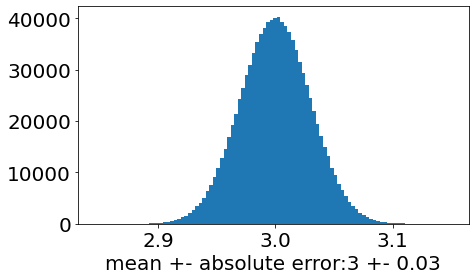

In [25]:
# this plot just shows a single number and its error
figure(2, figsize=((7, 4)))
hist(d1, N_Bins, histtype='stepfilled')
xlabel('mean +- absolute error:' + str(x1) + ' +- ' + str(sigma1))

Text(0.5, 0, 'mean + absolute error')

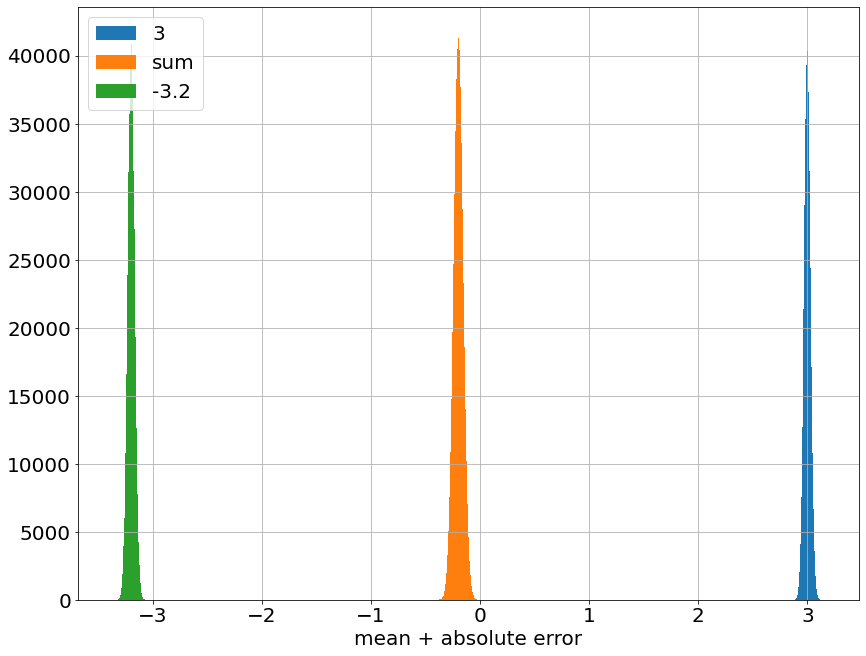

In [26]:
figure(1, figsize=((14, 24)))
# plot histograms of the two numbers and their sum
ax = subplot(2, 1, 1)
hist(d1, N_Bins, histtype='stepfilled')
hist(sumd, N_Bins, histtype='stepfilled')
hist(d2, N_Bins, histtype='stepfilled')
leg=legend((str(x1), 'sum', str(x2)), loc='upper left')
ax.grid(True)
xlabel('mean + absolute error')

Text(0.5, 0, 'fractional error')

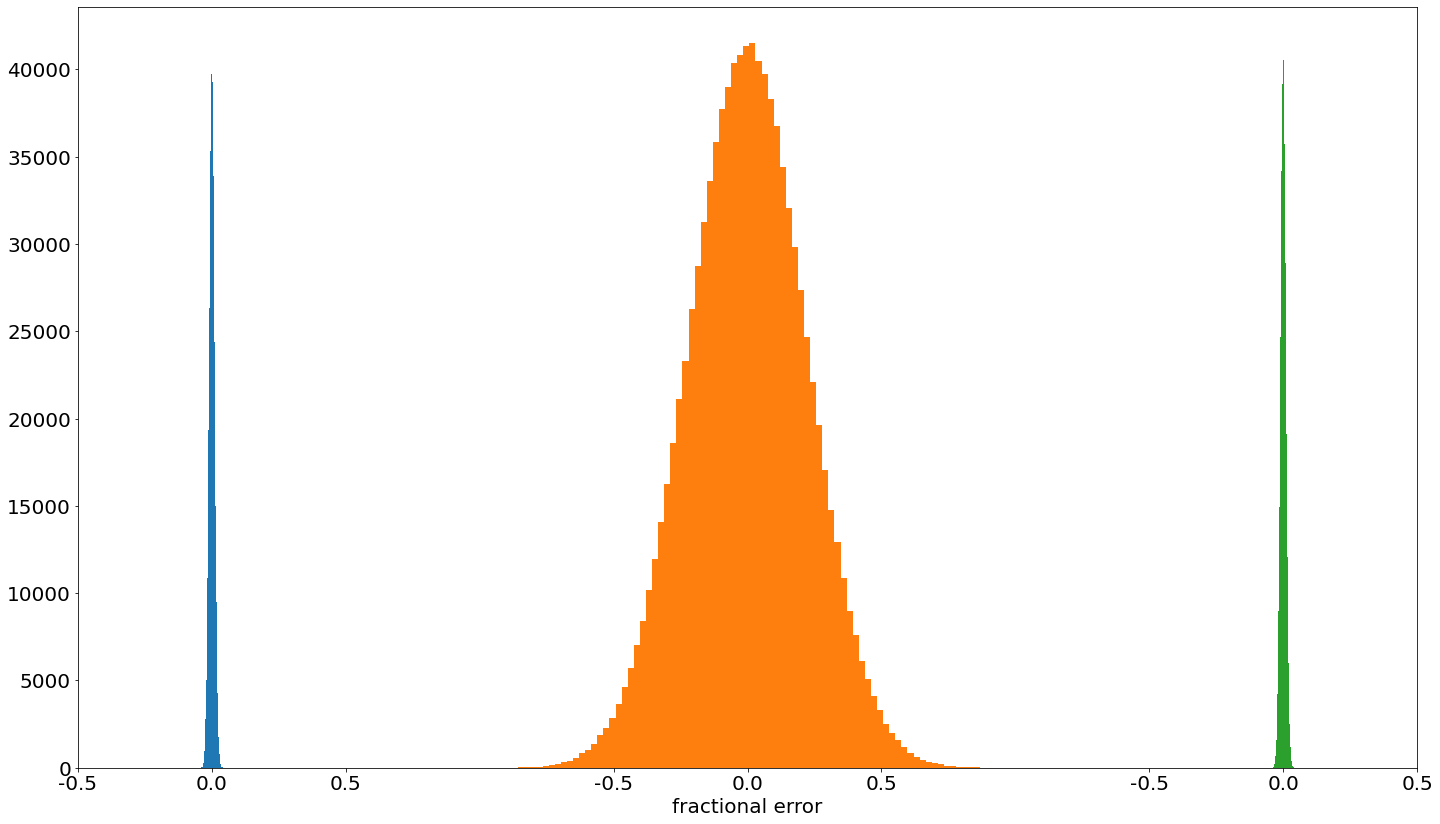

In [27]:
# then plot fractional error by dividing by the mean values.
# fractional errors will be large for opposite-signed large numbers
# offset and spread have to be adjusted to make the plots clear.
fg = figure(figsize=(24, 14))
offset = 2
spread = offset/4.0
hist(-offset+(d1-x1)/x1, N_Bins, histtype='stepfilled')

hist((sumd-(x1+x2))/(x1+x2), N_Bins, histtype='stepfilled')
hist(offset+(d2-x2)/x2, N_Bins, histtype='stepfilled')

xticks([-offset-spread, -offset, -offset+spread, -spread, 0,
        spread, offset-spread, offset, offset+spread],
       [str(-spread), str(0.0), str(spread), str(-spread),
        str(0.0), str(spread), str(-spread), str(0.0), str(spread)])

fg.gca()
ax.grid(True)

xlabel('fractional error')

These errors in differences become **very important** when taking numerical derivatives:
$$\frac{df}{dt} \approx \frac{f_{i+1} - f_i}{\Delta t} = \text{danger zone}$$
as we will see next week.

### One important rule

Never, ever. Never ever ever. Do something like this:

In [28]:
if 7./3. - 4./3. - 1. == 0:
    print('7/3 - 4/3 - 1 = 0')
else:
    print('7/3 - 4/3 - 1 != 0')

7/3 - 4/3 - 1 != 0


Instead:

In [29]:
delta = 1e-15
if abs(7./3. - 4./3. - 1.) < delta:
    print('7/3 - 4/3 - 1 = 0 (or close enough anyway...)')
else:
    print('7/3 - 4/3 - 1 != 0')

7/3 - 4/3 - 1 = 0 (or close enough anyway...)


## Error #2: Approximation errors

* errors introduced in functions due to approximations
* very important to consider for **integration** & **differentiation** algorithms
* we approximate these operations and there is an error in that approximation
* Most integration/differentiation algorithms are somehow based on Taylor series expansions, so you can usually figure out the approximation error by looking at the terms in the Taylor expansion that you ignore.

This should become clearer once we illustrate it with numerical integrations.

# Numerical integration

* Think of integrals as areas under curves.
* Approximate these areas in terms of simple shapes (rectangles, trapezoids, rectangles with parabolic tops)

![From Newman, composite of figs. 5.1 and 5.2.](RecTrapSimp.png)

## Trapezoidal rule

* Break up interval into $N$ slices,
* Approximate function as segments on each slice.


![From Newman: fig. 5.1b](Fig5-1b.png)

* N slices from a to b means that slice width: $$h = (b - a )/N$$
* area of $k$’s slice’s trapezoid: (Rectangle + Triangle)
$$A_k = f(x_k)h + \frac{h[f(x_k+h)-f(x_k)]}2 \\ = \frac{h[f(x_k) + f(x_k +h)]}2.$$
* Total area (our approximation for the integral) (and using $x_k=a+kh$):
$$ \boxed{I(a, b) = h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right].} $$

$$\text{Recall } I(a, b) = h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right].$$

For future reference, let's do a symbolic integral of $f(x) = x^4 - 2x + 1$ on the interval $[0, 2]$

In [30]:
import sympy  # the symbolic math package
# sympy.init_printing()

# Newman's example on pp. 142-143
def f(x):
    return x**4 - 2*x + 1

a = 0.0  # beginning of interval
b = 2.0  # end of interval

# For future reference: symbolic integration
xs = sympy.Symbol('xs', real=True)  # the variable of integration
sympy.integrate(f(xs), (xs, a, b))

4.40000000000000

In [35]:
N = 10000  # number of slices; try and increase it
h = (b-a)/N  # width of slice

s = 0.5*f(a) + 0.5*f(b)  # the end bits
for k in range(1,N):  # adding the interior bits
    s += f(a+k*h)  # and 

print("Trapezoidal rule =>", h*s)

Trapezoidal rule => 4.400000106666671


## Simpson's rule

* Break up interval into $N$ slices,
* approximate function as a **quadratic** for every 2 slices
* need 2 slices because you need 3 points to define a quadratic
* more slices $\Rightarrow$ better approximation to function
* Number of slices need to be even! If uneven, either discard one, or use trapezoidal rule on one slice.

![From Newman: fig. 5.2](Fig5-2.png)

* Area of each 2-slice quadratic (see text for formula):
$$A_k = \frac{h}3\left[f(a+(2k-2)h) + 4f(a+(2k-1)h) + f(a+2kh)\right].$$
* Adding up the slices:
$$\boxed{I(a,b) = \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{k\ odd\\ 1\dots{}N-1}}f(a+kh) + 2\sum_{\substack{k\ even \\ 2\dots{}N-2}}f(a+kh)\right].}$$
* In Python, you can easily sum over even and odd values:

    `for k in range(1, N, 2)` for the odd terms, and

    `for k in range(2, N, 2)` for the even terms.

## Error estimation

* If you tried the trapezoidal integration routine, you noticed that the error (difference between true value of the integral and computed value) goes down as $N$ increases.
* How fast?

### Euler-MacLaurin formulas

Example, for the trapezoidal rule:
$$ I(a, b) = \int_a^b f(x)dx = \underbrace{h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]}_{\text{the method}} + \underbrace{\epsilon}_{\text{the error}}$$

* using Taylor expansions, can find order of error for different Newton-Cotes (see text; trapeze and Simpson are examples) formulas.
* These error formulas are called “Euler-MacLaurin” formulas.

* Trapezoidal rule is a "1$^{\text{st}}$-order" integration rule, i.e. accurate up to and including terms proportional to $h$. Leading order approximation error is of order $h^2$:
$$\boxed{\epsilon = \frac{h^2[f'(a) - f'(b)]}{12} + h.o.t.}$$
(see text for derivation)

* Simpson’s rule is a "3$^{\text{rd}}$-order" integration rule, i.e., accurate up to and including terms proportional to $h^3$. Leading order approximation error is of order $h^4$ (even though we go from segments to quadratics!)
$$\boxed{\epsilon = \frac{h^4[f'''(a) - f'''(b)]}{180} + h.o.t.}$$
(see text for non-derivation, and typo)

### A more practical estimate

* What if you don't know $f'$, $f'''$, etc.?
* if you know the order of the error, (e.g., $\epsilon \propto h^2$ for trapeze), there is a way.

1. choose $N$ intervals, compute $I_N(a, b)$. You **know** that $$I(a, b) = I_N(a, b) + Ch^2$$ (for trapz). But you don't know $C$.
2. Double $N$: compute $I_{2N}(a, b)$. You **know** that $$\underbrace{I(a, b)}_{true} = \underbrace{I_{2N}(a, b)}_{computed} + \underbrace{C\left(\frac{h}2\right)^2}_{error} = I_{2N}(a, b) + \frac{C}4 h^2.$$ $C$ does not change: e.g., for trapz, $C = [f'(a) - f'(b)]/12$.
3. Both equations above are $= I(a, b)$, the "true" value. Substract and re-arrange:
$$\boxed{\underbrace{\frac{I_{2N}(a, b) - I_{N}(a, b)}{h^2}}_{known} = \frac{3}{4} \underbrace{C}_{unknown}}$$

* For Simpson's rule, we would find:
$$\frac{I_{2N}(a, b) - I_{N}(a, b)}{h^4} = \frac{16}{15}C.$$
* Works in principle for any Newton-Cotes formula.
* Basic idea:
    1. compute integral from $N$ points,
    2. double $N$, compute again,
    3. compare.
    
* Note: the texbook uses a different convention, using $h/2$ as reference instead of my $h$, hence the different coefficients.

# Summary

## Errors

### Rounding errors

* Computers store only a certain number of significant digits.
* The fractional error depends on the machine, the software (maybe), but NOT the number itself.
* DANGER: subtracting two numbers that are very close in value. The final result may be so small, it is comparable to the error.

### Approximation error

* Discretizing means approximating. Sometimes, the approximation error piles up and the result becomes mumbo-jumbo.

## Integrating functions

### Newton-Cotes formulas

* Rectangle method (Riemann sum): simply add the values, multiply by step size $h$.
* Trapezoidal rule: sum areas of little trapezoids. Error $\propto h^2$
* Simpson rule: fit a 2nd-order polynomial under 3 points, sum the areas. Error $\propto h^4$
* ...

### Estimating the error

* Euler-MacLaurin formulas if some analytical knowledge of the integrand.
* Practical estimate: compute error with two different resolutions, find missing coefficient.